Build a regression model.

In [88]:
# import numpy
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import statsmodels.api as sm

In [123]:
#df_Mrge_table_all = pd.read_csv('data/Mrge_table.csv')
df_Mrge_table = pd.read_csv('data/data_for_model.csv')


In [124]:
#for one station 

#df_groupby_tmp = df_Mrge_table_all[df_Mrge_table_all['stationsid']=='010507feed5b8d87c40cd95933ed5654']
#type(df_groupby_tmp)
#df_groupby_tmp = df_Mrge_table_all[df_Mrge_table_all['stationsid']=='010507feed5b8d87c40cd95933ed5654'].groupby(by='stationsid')
#type(df_groupby_tmp)

#df_groupby_tmp = df_Mrge_table_all.groupby(by='stationsid').count()

#df_groupby_tmp
#df_Mrge_table = df_groupby_tmp.to_frame()

#df_Mrge_table = df_groupby_tmp
#type(df_Mrge_table)

In [154]:
df_Mrge_table.head(10)

,stationsid,free_bikes,mean_Rating,min_Rating,max_Rating,busy_station
0,01136ad859ed85b0b15029e1b1e702fc,12.0,8.800,8.8,8.8,0
1,0153756b9e136b96e730aaa2f048227f,9.0,0.000,0.0,0.0,0
2,019e5937c3fc120cee906770bca8fa69,6.0,0.000,0.0,0.0,0
3,026bf7c2104a659ef0392f1c22bc6e17,15.0,3.925,0.0,7.9,1
4,02d90c8ede19da66083e0d0e14d17258,2.0,0.000,0.0,0.0,0
5,02feaaef65cff4671fb1935179895659,29.0,7.400,7.4,7.4,1
6,033dd75f330fec10400341177c68036e,22.0,8.150,7.4,8.9,1
7,03b565f085260e768988cd216fbeeef4,6.0,0.000,0.0,0.0,0
8,03cb067499bb9bc86cf0c884edb403bc,13.0,6.325,0.0,9.1,0
9,044fd938d016b91837e9b02be913b5c7,7.0,8.900,8.9,8.9,0


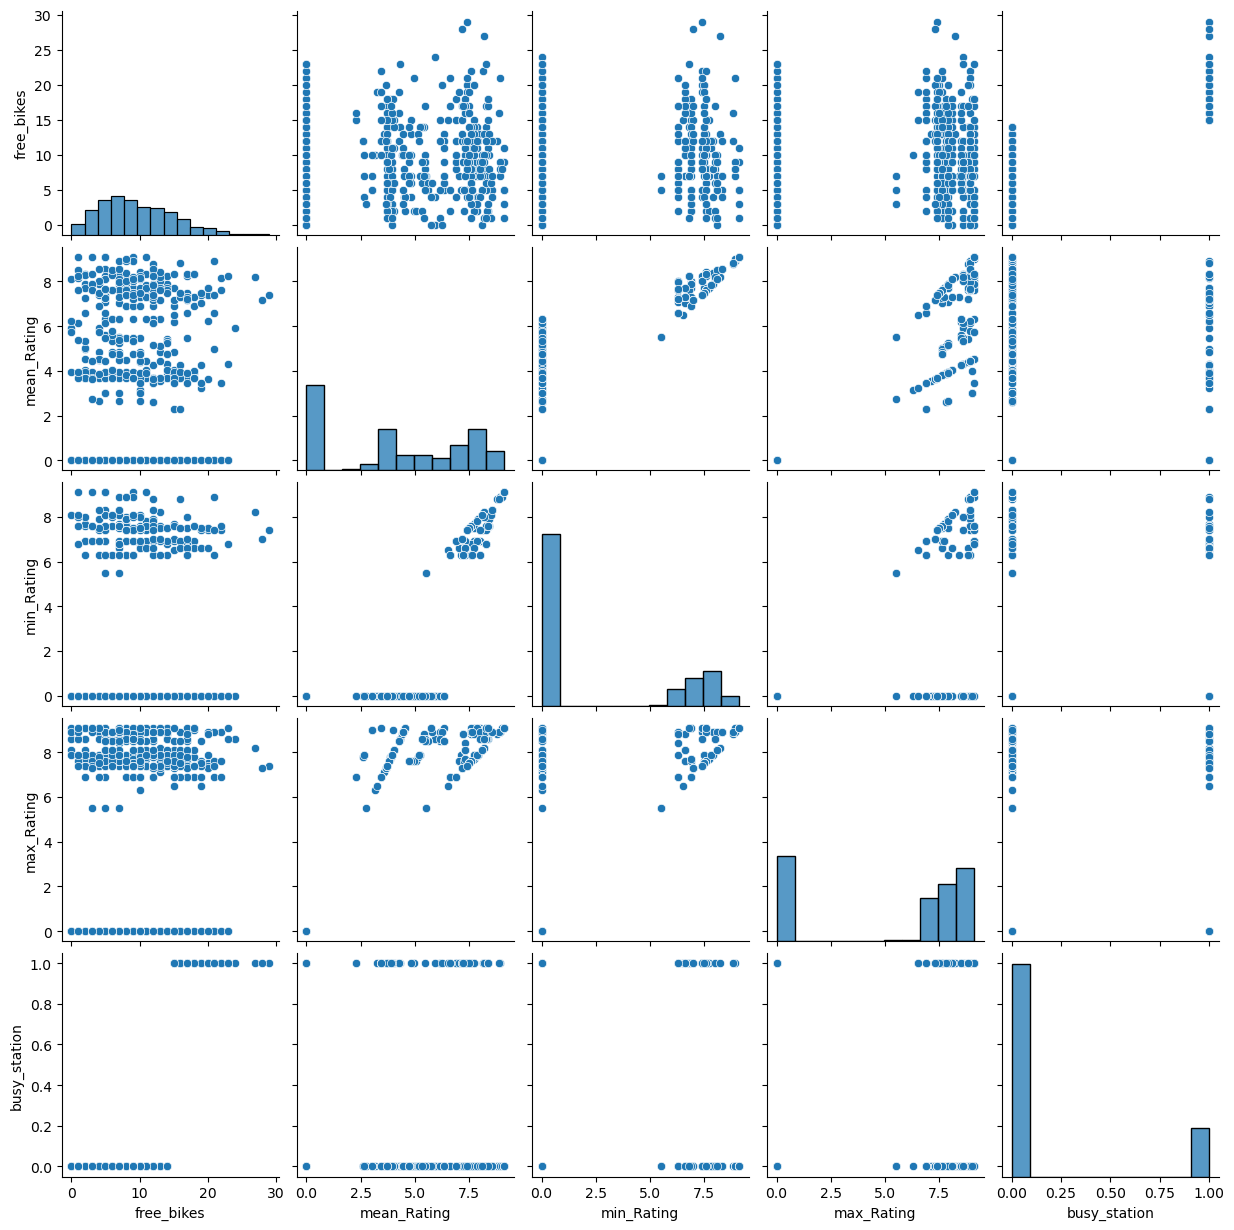

In [126]:
#Let's use seaborn's pairplot to informally check if there is linearity between the numerical variables.
sns.pairplot(data=df_Mrge_table)
plt.show()

In [127]:
#Let's check this by looking at the correlations.
df_Mrge_table.corr()

C:\Users\Danijela\AppData\Local\Temp\ipykernel_7124\2474735152.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_Mrge_table.corr()


,free_bikes,mean_Rating,min_Rating,max_Rating,busy_station
free_bikes,1.000000,0.087077,0.076519,0.087678,0.749114
mean_Rating,0.087077,1.000000,0.818100,0.898255,0.027539
min_Rating,0.076519,0.818100,1.000000,0.515001,0.031136
max_Rating,0.087678,0.898255,0.515001,1.000000,0.033110
busy_station,0.749114,0.027539,0.031136,0.033110,1.000000


In [129]:
stat, p1 = scipy.stats.pearsonr(df_Mrge_table['mean_Rating'], df_Mrge_table['free_bikes'])
print(p1)

#p-values is <0.05, so we can conclude we have significant correlation.

0.045919011805909904


Provide model output and an interpretation of the results. 

Simple Linear Regression

In [130]:
y = df_Mrge_table['free_bikes']
X = df_Mrge_table['mean_Rating']
X = sm.add_constant(X) #adds a column of 1's so the model will contain an intercept, bias
X.head()

,const,mean_Rating
0,1.0,8.800
1,1.0,0.000
2,1.0,0.000
3,1.0,3.925
4,1.0,0.000


In [131]:
model = sm.OLS(y, X)
results = model.fit() #fit the model (this is where OLS is actually being run)
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             free_bikes   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     4.004
Date:                Sun, 23 Apr 2023   Prob (F-statistic):             0.0459
Time:                        17:25:51   Log-Likelihood:                -1633.7
No. Observations:                 526   AIC:                             3271.
Df Residuals:                     524   BIC:                             3280.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           8.7659      0.381     23.036      

- R-squared: 0.014, That means that model not fit

- p>|t|: 0.000, taht means indep. variable does not have an effect on dep. variable

R-squared: goodness of fit. (Ranges from 0 to 1)

coef: The coefficient (slope) for each independent variable (and constant).
P>|t|: P-value for the hypthesis test:
H0: Coefficient (slope) is zero (indep. variable does not have an effect on dep. variable)
Ha: Coefficient (slope) is not zero (indep. variable has an effect on dep. variable).

##### Residual plots

In [132]:
residuals = results.resid
residuals

0      1.954125
1      0.234142
2     -2.765858
3      5.663225
4     -6.765858
         ...   
521   -0.304047
522   -2.685870
523   -2.765858
524   -2.202228
525   -0.541626
Length: 526, dtype: float64

Normality

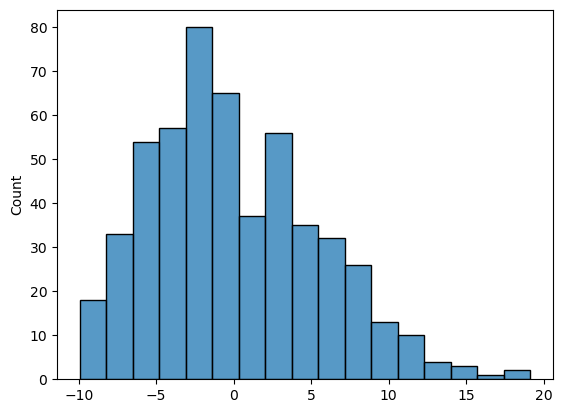

In [133]:
sns.histplot(residuals)
plt.show()

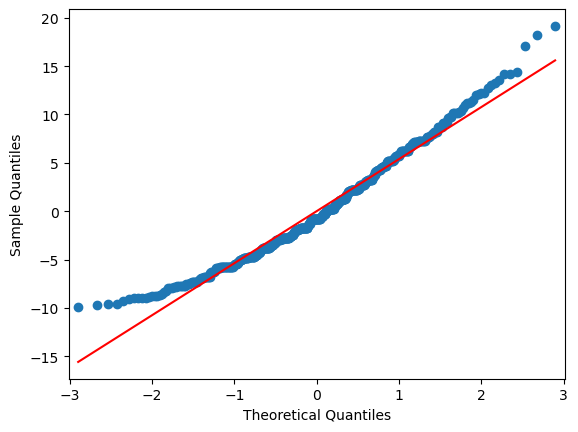

In [134]:
sm.qqplot(residuals, line="r")
plt.show()

In [135]:
scipy.stats.shapiro(residuals)

ShapiroResult(statistic=0.9723020792007446, pvalue=2.039496393990703e-08)

Homoscedasticity

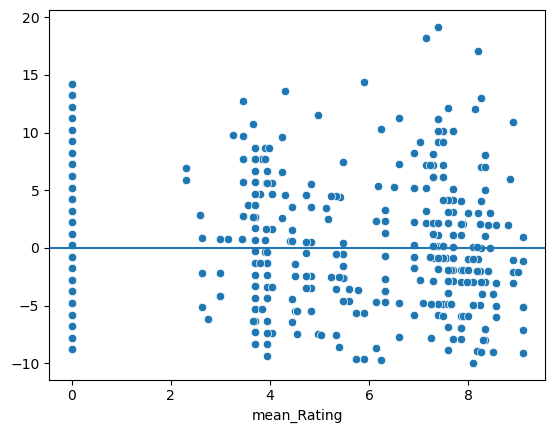

In [137]:
ax = sns.scatterplot(x=df_Mrge_table['mean_Rating'], y=residuals)
ax.axhline(0) #horizontal line at 0

In [138]:
stat, p, f_stat, f_p = sm.stats.diagnostic.het_breuschpagan(residuals,results.model.exog)
print(p,f_p)

0.2168209900330885 0.2175824242826162


Extracting coefficients for predictions

In [139]:
b = results.params['const']
m = results.params['mean_Rating']

known_Rating = 8
predicted_free_bike = np.exp(m*known_Rating + b)
predicted_free_bike

20527.27518038808

In [163]:
df_Mrge_table.head(10)

#df_Mrge_table['mean_Rating']==df_Mrge_table['mean_Rating'].round(decimals = 2)

df_Mrge_table.dtypes

stationsid       object
free_bikes      float64
mean_Rating     float64
min_Rating      float64
max_Rating      float64
busy_station      int32
dtype: object

In [170]:
#run full model
y = df_Mrge_table['free_bikes']
X = df_Mrge_table.drop(['free_bikes','stationsid','busy_station'], axis=1)
X = sm.add_constant(X) #adds a column of 1's so the model will contain an intercept

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             free_bikes   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.980
Date:                Sun, 23 Apr 2023   Prob (F-statistic):              0.116
Time:                        19:59:00   Log-Likelihood:                -1632.7
No. Observations:                 526   AIC:                             3273.
Df Residuals:                     522   BIC:                             3290.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           8.6824      0.410     21.152      

How can you turn the regression model into a classification model?

Logistic Regression

In [141]:
#df_Mrge_table['CategoryName'].value_counts()

In [149]:
#selct_value = (df_Mrge_table['CategoryName']=='Bar') | (df_Mrge_table['CategoryName']=='Sports Bar')
#log_reg_df = df_Mrge_table[selct_value] 

# replace 'prof' and 'bc' with 1 and 0, respectively
#log_reg_df.loc[log_reg_df['CategoryName'] == 'Bar', 'CategoryName'] = 1
#log_reg_df.loc[log_reg_df['CategoryName'] == 'Sports Bar', 'CategoryName'] = 0

#log_reg_df['CategoryName'].value_counts()
df_Mrge_table.dtypes


stationsid       object
free_bikes      float64
mean_Rating     float64
min_Rating      float64
max_Rating      float64
busy_station    float64
dtype: object

In [150]:
# Convert single column to int dtype.
df_Mrge_table['busy_station'] = df_Mrge_table['busy_station'].astype('int')

In [152]:
y = df_Mrge_table['busy_station']
X = df_Mrge_table[['mean_Rating']]
X = sm.add_constant(X) #adds a column of 1's so the model will contain an intercept

model = sm.Logit(y.astype(float),X.astype(float)) # (need to send in as floats)

results = model.fit() #fit the model (MLE)
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.477636
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:           busy_station   No. Observations:                  526
Model:                          Logit   Df Residuals:                      524
Method:                           MLE   Df Model:                            1
Date:                Sun, 23 Apr 2023   Pseudo R-squ.:               0.0007950
Time:                        17:35:07   Log-Likelihood:                -251.24
converged:                       True   LL-Null:                       -251.44
Covariance Type:            nonrobust   LLR p-value:                    0.5272
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.5785      0.186     -8.499      0.000      -1.942      -1.214
mean_Rating     0.0219    

In [153]:
b0 = results.params['const']
b1 = results.params['mean_Rating']

known_Rating = 8

exponent = -(b0+b1*known_Rating)
prob_busy_station = 1/(1+np.exp(exponent))
prob_busy_station

0.1973574792714139